In [12]:
import pandas as pd
# from collections import Counter
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as gmm
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from imblearn.pipeline import Pipeline
# from scipy import linalg
from sklearn import metrics
#extract the data
raw_df = pd.read_csv("BitcoinHeistData.csv")
cleaned_df = raw_df.copy()

#clean the data
cleaned_df['class']=np.array([0 if x=='white' else 1 for x in cleaned_df.pop('label')])
cleaned_df.pop("address")
cleaned_df.pop("year")
cleaned_df.pop("day")
print(cleaned_df.head(5))


#summarize data distribution
y=np.array(cleaned_df['class'])
X=np.array(cleaned_df.iloc[:,:-1])
# print(Counter(y))


#rescale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# define the undersampling method
under = RandomUnderSampler(sampling_strategy=0.5)
X_bitcoin,y_bitcoin = under.fit_resample(X,y)

X_bitcoin_train,X_bitcoin_test,y_bitcoin_train,y_bitcoin_test = train_test_split(X,y,test_size=1/4)



raw_df = pd.read_csv('Skin_NonSkin.txt', delimiter='	',names=["B", "R", "G", "class"])
cleaned_df = raw_df.copy()
cleaned_df['class']=np.array([1 if x==1 else 0 for x in cleaned_df['class']])
print(cleaned_df.head(5))
#summarize data distribution
yy=np.array(cleaned_df['class'])
XX=np.array(cleaned_df.iloc[:,:-1])
# print(Counter(y))

#rescale data
scaler = StandardScaler()
XX = scaler.fit_transform(XX)

X_skin,y_skin = XX,yy
y_skin = yy
X_skin_train,X_skin_test,y_skin_train,y_skin_test=train_test_split(X_skin,y_skin,test_size=1/7)

##write the splitted data

# bitcoin_train_df = pd.DataFrame(np.concatenate((X_bitcoin_train,y_bitcoin_train.reshape(-1,1)),axis=1),columns=["length","weight","count","looped","neighbors","income","class"])
# bitcoin_test_df = pd.DataFrame(np.concatenate((X_bitcoin_test,y_bitcoin_test.reshape(-1,1)),axis=1),columns=["length","weight","count","looped","neighbors","income","class"])
# skin_train_df = pd.DataFrame(np.concatenate((X_skin_train,y_skin_train.reshape(-1,1)),axis=1),columns=['B','R','G','class'])
# skin_test_df = pd.DataFrame(np.concatenate((X_skin_test,y_skin_test.reshape(-1,1)),axis=1),columns=['B','R','G','class'])
# bitcoin_train_df.to_csv(r'bitcoin_train.txt',sep='\t', index = None,mode='a')
# bitcoin_test_df.to_csv(r'bitcoin_test.txt',sep='\t', index= None,mode='a')
# skin_train_df.to_csv(r'skin_train.txt',sep='\t',index = None,mode='a')
# skin_test_df.to_csv(r'skin_test.txt',sep='\t', index = None,mode='a')

def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)



   length    weight  count  looped  neighbors       income  class
0      18  0.008333      1       0          2  100050000.0      1
1      44  0.000244      1       0          1  100000000.0      1
2       0  1.000000      1       0          2  200000000.0      1
3      72  0.003906      1       0          2   71200000.0      1
4     144  0.072848    456       0          1  200000000.0      1
    B   R    G  class
0  74  85  123      1
1  73  84  122      1
2  72  83  121      1
3  70  81  119      1
4  70  81  119      1


start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
**********
train finished
train finished
train finished
train finished
train finished
train finished
train finished


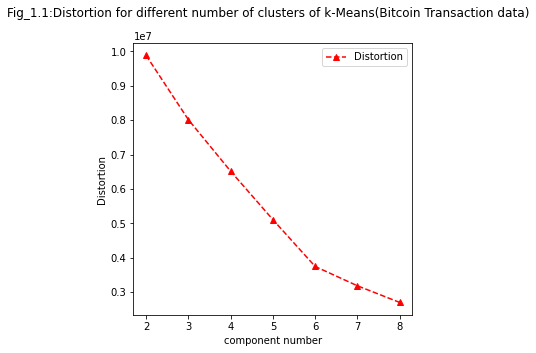

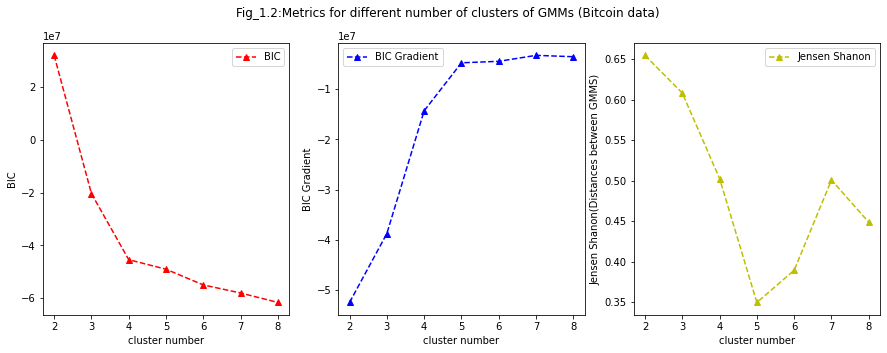

In [13]:
#########k-means and EM on bitcoin########
n_components_range = range(2, 9)
distortion =[]
# sil_score = []

for n_components in n_components_range:
    print("start to train")
    kmeans = KMeans(n_clusters=n_components,random_state=1)
    kmeans.fit(X_bitcoin_train)
    print("train finished")
    distortion.append(kmeans.inertia_)
#     labels=kmeans.predict(X)b
#     sil_score.append(metrics.silhouette_score(X,labels,metric='euclidean'))
#     cal_score.append(metrics.calinski_harabasz_score(X,labels)
#   print("sil_score computed")
   
#########plot the graph of metrics: distortion,silhouette########
fig_1,axs = plt.subplots(1,1, figsize=(5, 5), sharey=False)

axs.plot(n_components_range,distortion,"r^",linestyle = "--",label='Distortion')
# axs[1].plot(n_components_range,sil_score,"b^",linestyle = "--",label='Silhouette')
# # axs[2].plot(n_components_range,sil_score,"g^",linestyle = "--",label='Silhouette')
# axs[2].plot(n_components_range,cal_score,"y^",linestyle = "--",label='Calinski Harabasz')
axs.set_xticks(n_components_range)              
axs.set_xlabel("component number")
axs.set_ylabel("Distortion")
axs.legend()

# axs[1].set_xticks(n_components_range)  
# axs[1].set_xlabel("component number")
# axs[1].set_ylabel("Silhouette")
# axs[1].legend()

# # axs[2].set_xlabel("component number")
# # axs[2].set_ylabel("Silhouette")
# # axs[2].legend()

# axs[2].set_xticks(n_components_range)  
# axs[2].set_xlabel("component number")
# axs[2].set_ylabel("Calinski Harabasz")
# axs[2].legend()
fig_1.suptitle("Fig_1.1:Distortion for different number of clusters of k-Means(Bitcoin Transaction data)")
fig_1.savefig("Fig_1.1:Distortion for different number of clusters of k-Means(Bitcoin Transaction data).png")
# EM Algorithm on bitcoin data

##########compute the BIC,BIC_gradient and Silhouette scores######

bic = []
bic_grad = []
# sil_score = []
iterations = 20
n_components_range = range(2, 9)

for n_components in n_components_range:
    bic_temp = []
    GMM = gmm(n_components=n_components,random_state=0)
    print("train finished")
    GMM.fit(X_bitcoin_train)
    bic.append(GMM.bic(X_bitcoin_train))
#     sil_score.append(np.mean(SelBest(sil_score_temp,int(iterations/5))))
bic_grad = np.gradient(bic)
               
print('**********')          
###############Compute the Jensen Shannon score#######
iterations = 5
n_components_range = range(2, 9)
js =[]

for n_components in n_components_range:
    distance=0
    for _ in range(iterations):
        train, test=train_test_split(X_bitcoin_train, test_size=0.5)
        gmm_train=gmm(n_components=n_components,random_state=0).fit(train) 
        gmm_test=gmm(n_components=n_components,random_state=0).fit(test)
        distance += gmm_js(gmm_train, gmm_test)
    js.append(distance/5)
    print("train finished")
    
fig_2, axs = plt.subplots(1,3, figsize=(15, 5), sharey=False)

axs[0].plot(n_components_range,bic,"r^",linestyle = "--",label='BIC')
axs[1].plot(n_components_range,bic_grad,"b^",linestyle = "--",label='BIC Gradient')
# axs[2].plot(n_components_range,sil_score,"g^",linestyle = "--",label='Silhouette')
axs[2].plot(n_components_range,js,"y^",linestyle = "--",label='Jensen Shanon')
               
axs[0].set_xlabel("cluster number")
axs[0].set_ylabel("BIC")
axs[0].legend()

axs[1].set_xlabel("cluster number")
axs[1].set_ylabel("BIC Gradient")
axs[1].legend()

# axs[2].set_xlabel("cluster number")
# axs[2].set_ylabel("Silhouette")
# axs[2].legend()
               
axs[2].set_xlabel("cluster number")
axs[2].set_ylabel("Jensen Shanon(Distances between GMMS)")
axs[2].legend()
fig_2.suptitle("Fig_1.2:Metrics for different number of clusters of GMMs (Bitcoin data)")
fig_2.savefig("Fig_1.2:Metrics for different number of clusters of GMMs (Bitcoin data).png")


start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished


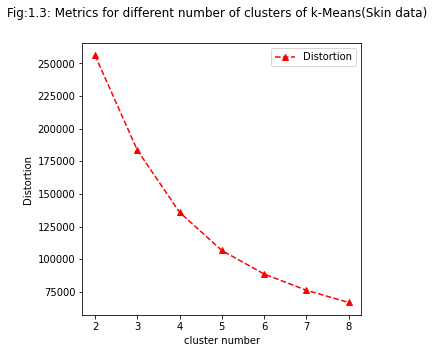

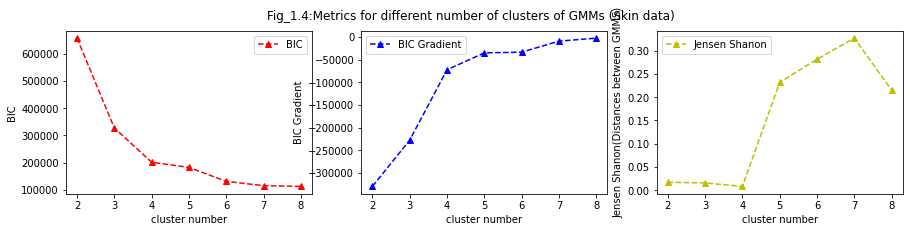

In [14]:
#########k-means on skindata#######
n_components_range = range(2, 9)
distortion =[]
# sil_score = []

for n_components in n_components_range:
    print("start to train")
    kmeans = KMeans(n_clusters=n_components,random_state=1)
    print("train finished")
    kmeans.fit(X_skin_train)
    distortion.append(kmeans.inertia_)
#     labels=kmeans.predict(X)
#     sil_score.append(metrics.silhouette_score(X,labels,metric='euclidean'))
# #     cal_score.append(metrics.calinski_harabasz_score(X,labels)
#   print("sil_score computed")
   
#########plot the graph of metrics
fig_3,axs = plt.subplots(1,1, figsize=(5, 5), sharey=False)

axs.plot(n_components_range,distortion,"r^",linestyle = "--",label='Distortion')
# axs[1].plot(n_components_range,sil_score,"b^",linestyle = "--",label='Silhouette')
# axs[2].plot(n_components_range,sil_score,"g^",linestyle = "--",label='Silhouette')
# axs[2].plot(n_components_range,cal_score,"y^",linestyle = "--",label='Calinski Harabasz')
axs.set_xticks(n_components_range)              
axs.set_xlabel("cluster number")
axs.set_ylabel("Distortion")
axs.legend()

# axs[1].set_xticks(n_components_range)  
# axs[1].set_xlabel("cluster number")
# axs[1].set_ylabel("Silhouette")
# axs[1].legend()

# axs[2].set_xlabel("component number")
# axs[2].set_ylabel("Silhouette")
# axs[2].legend()

# axs[2].set_xticks(n_components_range)  
# axs[2].set_xlabel("component number")
# axs[2].set_ylabel("Calinski Harabasz")
# axs[2].legend()
fig_3.suptitle("Fig:1.3: Distortion for different number of clusters of k-Means(Skin data)")
fig_3.savefig("Fig:1.3: Distortion for different number of clusters of k-Means(Skin data).png")
    
# EM Algorithm on skin data


##########compute the BIC,BIC_gradient and Silhouette scores######

bic = []
bic_grad = []
# sil_score = []

n_components_range = range(2, 9)

for n_components in n_components_range:
    
    # Fit a Gaussian mixture with EM
    print("start to train")
    GMM = gmm(n_components=n_components,random_state=1)
    print("train finished")
    GMM.fit(X_skin_train)
    bic.append(GMM.bic(X_skin_train))
#     sil_score.append(metrics.silhouette_score(X,labels,metric='euclidean'))
#     print("sil_score computed")
    
bic_grad = np.gradient(bic)
               
               
###############Compute the Jensen Shannon score#######
n_components_range = range(2, 9)
js =[]

for n_components in n_components_range:
    train, test=train_test_split(X_skin_train, test_size=0.5)
    GMM_train=gmm(n_components=n_components,random_state=0).fit(train) 
    GMM_test=gmm(n_components=n_components,random_state=0).fit(test) 
    print("train finished")
    js.append(gmm_js(GMM_train, GMM_test))
    
#########plot the graph of metrics
fig_4,axs = plt.subplots(1,3, figsize=(15, 3), sharey=False)
axs[0].plot(n_components_range,bic,"r^",linestyle = "--",label='BIC')
axs[1].plot(n_components_range,bic_grad,"b^",linestyle = "--",label='BIC Gradient')
# axs[2].plot(n_components_range,sil_score,"g^",linestyle = "--",label='Silhouette')
axs[2].plot(n_components_range,js,"y^",linestyle = "--",label='Jensen Shanon')
axs[0].set_xticks(n_components_range)              
axs[0].set_xlabel("cluster number")
axs[0].set_ylabel("BIC")
axs[0].legend()

axs[1].set_xticks(n_components_range)  
axs[1].set_xlabel("cluster number")
axs[1].set_ylabel("BIC Gradient")
axs[1].legend()

# axs[2].set_xlabel("component number")
# axs[2].set_ylabel("Silhouette")
# axs[2].legend()

axs[2].set_xticks(n_components_range)  
axs[2].set_xlabel("cluster number")
axs[2].set_ylabel("Jensen Shanon(Distances between GMMS)")
axs[2].legend()
fig_4.suptitle("Fig_1.4:Metrics for different number of clusters of GMMs (Skin data)")
fig_4.savefig("Fig_1.4:Metrics for different number of clusters of GMMs(Skin).png")




start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished


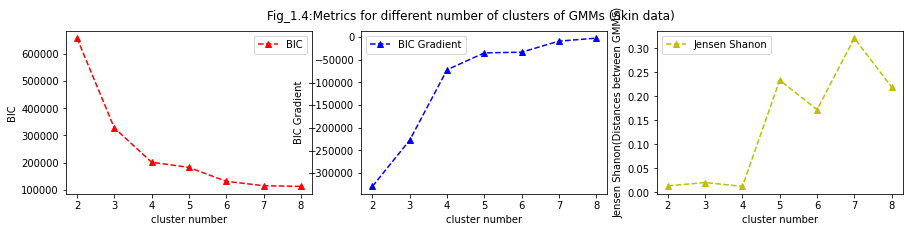

In [16]:
# EM Algorithm on skin data


##########compute the BIC,BIC_gradient and Silhouette scores######

bic = []
bic_grad = []
# sil_score = []

n_components_range = range(2, 9)

for n_components in n_components_range:
    
    # Fit a Gaussian mixture with EM
    print("start to train")
    GMM = gmm(n_components=n_components,random_state=1)
    print("train finished")
    GMM.fit(X_skin_train)
    bic.append(GMM.bic(X_skin_train))
#     sil_score.append(metrics.silhouette_score(X,labels,metric='euclidean'))
#     print("sil_score computed")
    
bic_grad = np.gradient(bic)
               
               
###############Compute the Jensen Shannon score#######
n_components_range = range(2, 9)
js =[]

for n_components in n_components_range:
    train, test=train_test_split(X_skin_train, test_size=0.5)
    GMM_train=gmm(n_components=n_components,random_state=0).fit(train) 
    GMM_test=gmm(n_components=n_components,random_state=0).fit(test) 
    print("train finished")
    js.append(gmm_js(GMM_train, GMM_test))
    
#########plot the graph of metrics
fig_4,axs = plt.subplots(1,3, figsize=(15, 3), sharey=False)
axs[0].plot(n_components_range,bic,"r^",linestyle = "--",label='BIC')
axs[1].plot(n_components_range,bic_grad,"b^",linestyle = "--",label='BIC Gradient')
# axs[2].plot(n_components_range,sil_score,"g^",linestyle = "--",label='Silhouette')
axs[2].plot(n_components_range,js,"y^",linestyle = "--",label='Jensen Shanon')
axs[0].set_xticks(n_components_range)              
axs[0].set_xlabel("cluster number")
axs[0].set_ylabel("BIC")
axs[0].legend()

axs[1].set_xticks(n_components_range)  
axs[1].set_xlabel("cluster number")
axs[1].set_ylabel("BIC Gradient")
axs[1].legend()

# axs[2].set_xlabel("component number")
# axs[2].set_ylabel("Silhouette")
# axs[2].legend()

axs[2].set_xticks(n_components_range)  
axs[2].set_xlabel("cluster number")
axs[2].set_ylabel("Jensen Shanon(Distances between GMMS)")
axs[2].legend()
fig_4.suptitle("Fig_1.4:Metrics for different number of clusters of GMMs (Skin data)")
fig_4.savefig("Fig_1.4:Metrics for different number of clusters of GMMs(Skin).png")




In [ ]:
#######kmeans cluster for bitcoin is 5, GMM cluster is 5 ######
########kmeans cluster for skin is ,GMM cluster is 4#####

In [ ]:
#######compute the clusters graph#######
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("U.A.")
    plt.ylabel("U.A.")



In [ ]:
# EM Algorithm on income prediction data
# #extract the data

#######workclass=8,education_num=16,martial_status=7,occupation=14,relationship=6,race=5,sex=2,country=41#####
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture as gmm

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
raw_df = pd.read_csv('adult.data',header=None,names=["age", "workclass", "fnlwgt", "education","education-num","martial-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"])
cleaned_df = raw_df.copy()


cleaned_df['class']=np.array([0 if x.strip()=="<=50K" else 1 for x in cleaned_df.pop('class')])
cleaned_df.pop("education")
cleaned_df.pop("fnlwgt")

##encoding features######
# encoding workclass#####
workclass_mapping={'Never-worked':0,'Without-pay':1,"Self-emp-not-inc":2,"Self-emp-inc":3,"Private":4,"Local-gov":5,"State-gov":6,"Federal-gov":7,'?':-1}                                           
cleaned_df['workclass']=np.array([workclass_mapping[workclass.strip()] for workclass in cleaned_df['workclass']])
#encoding sex##

le = LabelEncoder()
cleaned_df['sex'] = le.fit_transform(cleaned_df['sex'])
#encoding martial_status using binary encoder####
ce_bin = ce.BaseNEncoder(cols = ['martial-status','relationship','race'],base=3)
cleaned_df=ce_bin.fit_transform(cleaned_df)
ce_bin = ce.BaseNEncoder(cols = ['occupation','native-country'],base=5)
cleaned_df=ce_bin.fit_transform(cleaned_df)
print(cleaned_df.head(10))
#summarize data distribution
y=np.array(cleaned_df['class'])
X=np.array(cleaned_df.iloc[:,:-1])
print(Counter(y))

#rescale data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

lowest_bic = np.infty
lowest_aic = np.infty
bic = []
aic =[]
n_components_range = range(1, 10)

for n_components in n_components_range:
    # Fit a Gaussian mixture with EM
    GMM = gmm(n_components=n_components,random_state=0)
    print("train finished")
    GMM.fit(X)
    print(GMM.bic(X))
    bic.append(GMM.bic(X))
    aic.append(GMM.aic(X))
    if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]
        best_GMM_bic = GMM
    if aic[-1] < lowest_aic:
        lowest_aic = aic[-1]
        best_GMM_aic = GMM

bic = np.array(bic)
print(bic)
fig_4, axs = plt.subplots(1, 2, figsize=(5, 10), sharey=False)

axs[0].plot(n_components_range,bic)
axs[0].set_xlabel("component number")
axs[0].set_ylabel("BIC")
axs[0].legend()
axs[1].plot(n_components_range,aic)
axs[1].set_xlabel("component number")
axs[1].set_ylabel("AIC")
axs[1].legend()
fig_4.suptitle("GMM on bitcoin transaction data")

# fig_1.savefig("Decision_fig_1.1_traninig:learning curves.png")
clf = best_GMM_aic
print(clf.n_components)
clf = best_GMM_bic
print(clf.n_components)



